<a href="https://colab.research.google.com/github/patilpratikk/Machine-Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Titanic***

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML/Competition/Kaggle/TitanicDB/train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



1.   We can see that we have many null values in cabin column 
2.   So we will be dropping that column in pre-processing

1.   Age column needs to be filled with mean value






In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sex Vs Survived


```
We can say that more females survived than males from the below analysis. 
```




In [ ]:
c_sur=df.groupby('Survived')['Sex'].value_counts()

In [ ]:
print(c_sur,type(c_sur))

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64 <class 'pandas.core.series.Series'>


# Summary of Survived


```
# Intresting Observations

1.   All Females who embarked from C and travelled in Pclass 2 survived
2.   All males who embarked from Q and travelled in Pclass 1 and 2 died. Their average ages are more than 40 which shows that, these men were middle aged or old.
3.  Overall Young population have survived irrespective of their class and gender as compared to middle aged and old population  


```



In [ ]:
summary=pd.pivot_table(df,index=['Embarked','Sex','Pclass','Survived'],values='Age')

In [ ]:
summary

Age
Embarked Sex    Pclass Survived           
C        female 1      0         50.000000
                       1         34.964181
                2      1         19.142857
                3      0         24.074669
                       1         16.019765
         male   1      0         40.379824
                       1         36.041125
                2      0         29.524890
                       1         15.349559
                3      0         28.529902
                       1         21.851735
Q        female 1      1         33.000000
                2      1         29.849559
                3      0         28.810719
                       1         27.178468
         male   1      0         44.000000
                2      0         57.000000
                3      0         29.113325
                       1         29.466078
S        female 1      0         13.500000
                       1         33.278184
                2      0         36.000000
                       1         29.101625
                3      0         24.781658
                       1         22.981765
         male   1      0         41.984123
                       1         35.204160
                2      0         33.142618
                       1         17.935275
                3      0         27.683370
                       1         23.729308

In [ ]:
c_surdf=pd.DataFrame(c_sur)

In [ ]:
c_surdf

Sex
Survived Sex        
0        male    468
         female   81
1        female  233
         male    109

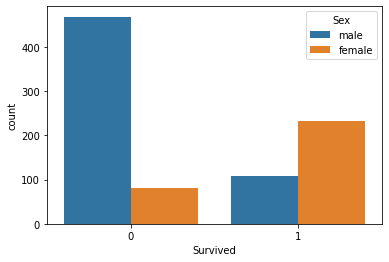

In [ ]:
sns.countplot(data=df,x='Survived',hue='Sex')

# Age Distribution

Text(0, 0.5, 'Count Density')

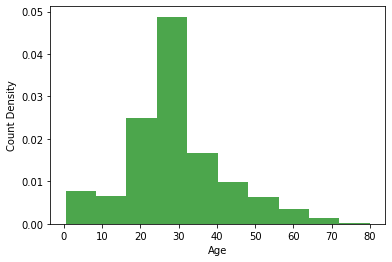

In [ ]:

plt.hist(df['Age'],10,density=1,color='green',alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count Density')

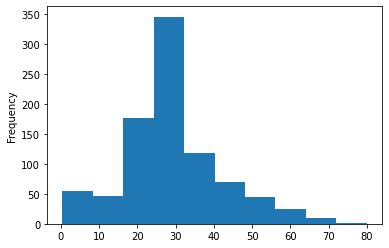

In [ ]:
df['Age'].plot(kind='hist')

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df2=df.iloc[:,[1,2,4,5,11]]

In [ ]:
df2

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,S
1,1,1,female,38.000000,C
2,1,3,female,26.000000,S
3,1,1,female,35.000000,S
4,0,3,male,35.000000,S
...,...,...,...,...,...
886,0,2,male,27.000000,S
887,1,1,female,19.000000,S
888,0,3,female,29.699118,S
889,1,1,male,26.000000,C


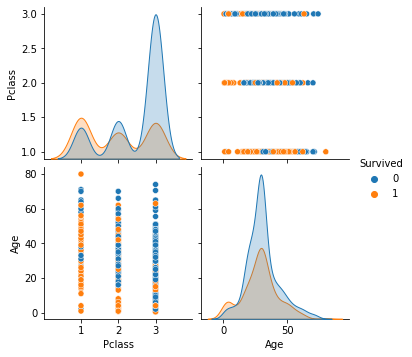

In [ ]:
sns.pairplot(df2,hue='Survived')

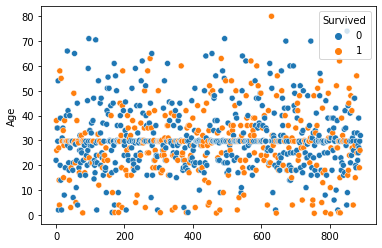

In [ ]:
sns.scatterplot(data=df,x=df.index,y='Age',hue='Survived')

In [ ]:
cor=df.corr()

In [ ]:
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


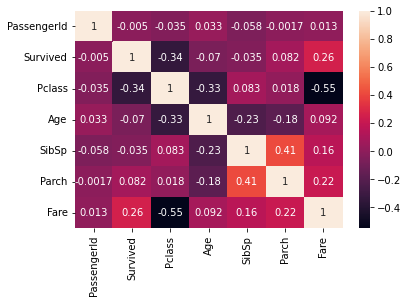

In [ ]:
sns.heatmap(cor,annot=True)

In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [ ]:
df[(df['Age']>60) &(df['Survived']==1)] #ONly 5 people greater than 60 age survied 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


# Preprocessing

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Lets Drop unnecessary columns first

In [ ]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [ ]:
df.describe(include='all') # checking all statistical values

,Survived,Pclass,Sex,Age,Embarked
count,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,2,NaN,3
top,NaN,NaN,male,NaN,S
freq,NaN,NaN,577,NaN,644
mean,0.383838,2.308642,NaN,29.699118,NaN
std,0.486592,0.836071,NaN,13.002015,NaN
min,0.000000,1.000000,NaN,0.420000,NaN
25%,0.000000,2.000000,NaN,22.000000,NaN
50%,0.000000,3.000000,NaN,29.699118,NaN
75%,1.000000,3.000000,NaN,35.000000,NaN


In [ ]:
df.isna().sum() # checking for null and NaN values

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    2
dtype: int64

In [ ]:
df=df.dropna() # droping NaN rows

In [ ]:
df.isna().sum() #checking result

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['Embarked']=le.fit_transform(df['Embarked']) # Embarked encoded C=0,Q=1,S=2

In [ ]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.000000,2
1,1,1,female,38.000000,0
2,1,3,female,26.000000,2
3,1,1,female,35.000000,2
4,0,3,male,35.000000,2
...,...,...,...,...,...
886,0,2,male,27.000000,2
887,1,1,female,19.000000,2
888,0,3,female,29.699118,2
889,1,1,male,26.000000,0


In [ ]:
df['Sex']=le.fit_transform(df['Sex']) #Sex label encoded F=0,M=1

In [ ]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.000000,2
1,1,1,0,38.000000,0
2,1,3,0,26.000000,2
3,1,1,0,35.000000,2
4,0,3,1,35.000000,2
...,...,...,...,...,...
886,0,2,1,27.000000,2
887,1,1,0,19.000000,2
888,0,3,0,29.699118,2
889,1,1,1,26.000000,0


#Modelling

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,2
1,1,1,0,38.0,0
2,1,3,0,26.0,2
3,1,1,0,35.0,2
4,0,3,1,35.0,2


In [ ]:
X=df.iloc[:,1:]
X.head()

,Pclass,Sex,Age,Embarked
0,3,1,22.0,2
1,1,0,38.0,0
2,3,0,26.0,2
3,1,0,35.0,2
4,3,1,35.0,2


In [ ]:
y=df.iloc[:,0:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=999,test_size=0.2,stratify=y)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit=LogisticRegression()

In [ ]:
logit.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=logit.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[93, 17],
       [17, 51]])

In [ ]:
log_acc=accuracy_score(y_test,y_pred)
log_acc

0.8089887640449438

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



## K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred2=knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred2)

array([[97, 13],
       [26, 42]])

In [ ]:
knn_acc=accuracy_score(y_test,y_pred2)
knn_acc

0.7808988764044944

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       110
           1       0.76      0.62      0.68        68

    accuracy                           0.78       178
   macro avg       0.78      0.75      0.76       178
weighted avg       0.78      0.78      0.78       178



In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','K Nearest Neighbor'],'Score' : [log_acc, knn_acc]  })


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.808989
1,K Nearest Neighbor,0.780899


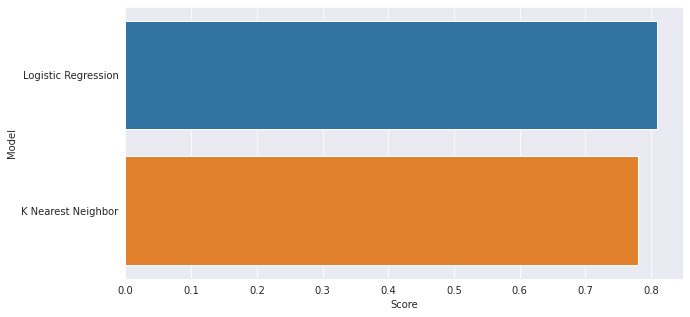

In [ ]:
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/ML/Competition/Kaggle/TitanicDB/test.csv')


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X.head()

,Pclass,Sex,Age,Embarked
0,3,1,22.0,2
1,1,0,38.0,0
2,3,0,26.0,2
3,1,0,35.0,2
4,3,1,35.0,2


In [ ]:
test=test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)
test.head()

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S


In [ ]:
test['Sex']=test['Sex'].map({'male':1,'female':0}).astype(int)

In [ ]:
test['Embarked']=test['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)

In [ ]:
test.head()

,Pclass,Sex,Age,Embarked
0,3,1,34.5,1
1,3,0,47.0,2
2,2,1,62.0,1
3,3,1,27.0,2
4,3,0,22.0,2


In [ ]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
Embarked     0
dtype: int64

In [ ]:
test['Age']=test['Age'].fillna(test.Age.median())

In [ ]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [ ]:
submission_pred=logit.predict(test)

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=10)

In [ ]:
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[97, 13],
       [21, 47]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8089887640449438

# Hyper Parametr Tunning

In [ ]:
param={'n_estimators':[10,20,30,40,50],'bootstrap':[True,False]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gsc=GridSearchCV(estimator=rf,
                 param_grid=param,
                 scoring='accuracy',
                 cv=10,n_jobs=-1)

In [ ]:
gsc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [ ]:
gsc.best_params_

{'bootstrap': True, 'n_estimators': 40}

In [ ]:
gsc.best_score_

0.808744131455399

In [ ]:
# RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rsc=RandomizedSearchCV(estimator=rf,param_distributions=param,scoring='accuracy',cv=10,n_jobs=-1,n_iter=3)

In [ ]:
rsc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   scoring='accuracy')

In [ ]:
rsc.best_params_

{'bootstrap': True, 'n_estimators': 20}

In [ ]:
rsc.best_score_

0.8044992175273865